In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff

plt.rcParams['figure.figsize'] = [16, 20]

In [143]:
raw_data, metadata = loadarff("data/Training Dataset.arff",)
data = pd.DataFrame(raw_data)

#convert values to integers instead of strings
for col in data.columns:
    data[col] = data[col].astype(int)

# data
X = data.loc[:, data.columns != "Result"]
# labels
Y = data.loc[:, data.columns == "Result"]


print("Features:")
print(", ".join(X.columns))
print()
print("Number of features: " + str(len(X.columns)))

Features:
having_IP_Address, URL_Length, Shortining_Service, having_At_Symbol, double_slash_redirecting, Prefix_Suffix, having_Sub_Domain, SSLfinal_State, Domain_registeration_length, Favicon, port, HTTPS_token, Request_URL, URL_of_Anchor, Links_in_tags, SFH, Submitting_to_email, Abnormal_URL, Redirect, on_mouseover, RightClick, popUpWidnow, Iframe, age_of_domain, DNSRecord, web_traffic, Page_Rank, Google_Index, Links_pointing_to_page, Statistical_report

Number of features: 30


In [137]:
data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [150]:
# search for missing values

for col in data.columns:
    missing_values_count = data.loc[:, col].isna().sum()
    print(f"Missing values for column {col}: {missing_values_count}")

Missing values for column having_IP_Address: 0
Missing values for column URL_Length: 0
Missing values for column Shortining_Service: 0
Missing values for column having_At_Symbol: 0
Missing values for column double_slash_redirecting: 0
Missing values for column Prefix_Suffix: 0
Missing values for column having_Sub_Domain: 0
Missing values for column SSLfinal_State: 0
Missing values for column Domain_registeration_length: 0
Missing values for column Favicon: 0
Missing values for column port: 0
Missing values for column HTTPS_token: 0
Missing values for column Request_URL: 0
Missing values for column URL_of_Anchor: 0
Missing values for column Links_in_tags: 0
Missing values for column SFH: 0
Missing values for column Submitting_to_email: 0
Missing values for column Abnormal_URL: 0
Missing values for column Redirect: 0
Missing values for column on_mouseover: 0
Missing values for column RightClick: 0
Missing values for column popUpWidnow: 0
Missing values for column Iframe: 0
Missing values

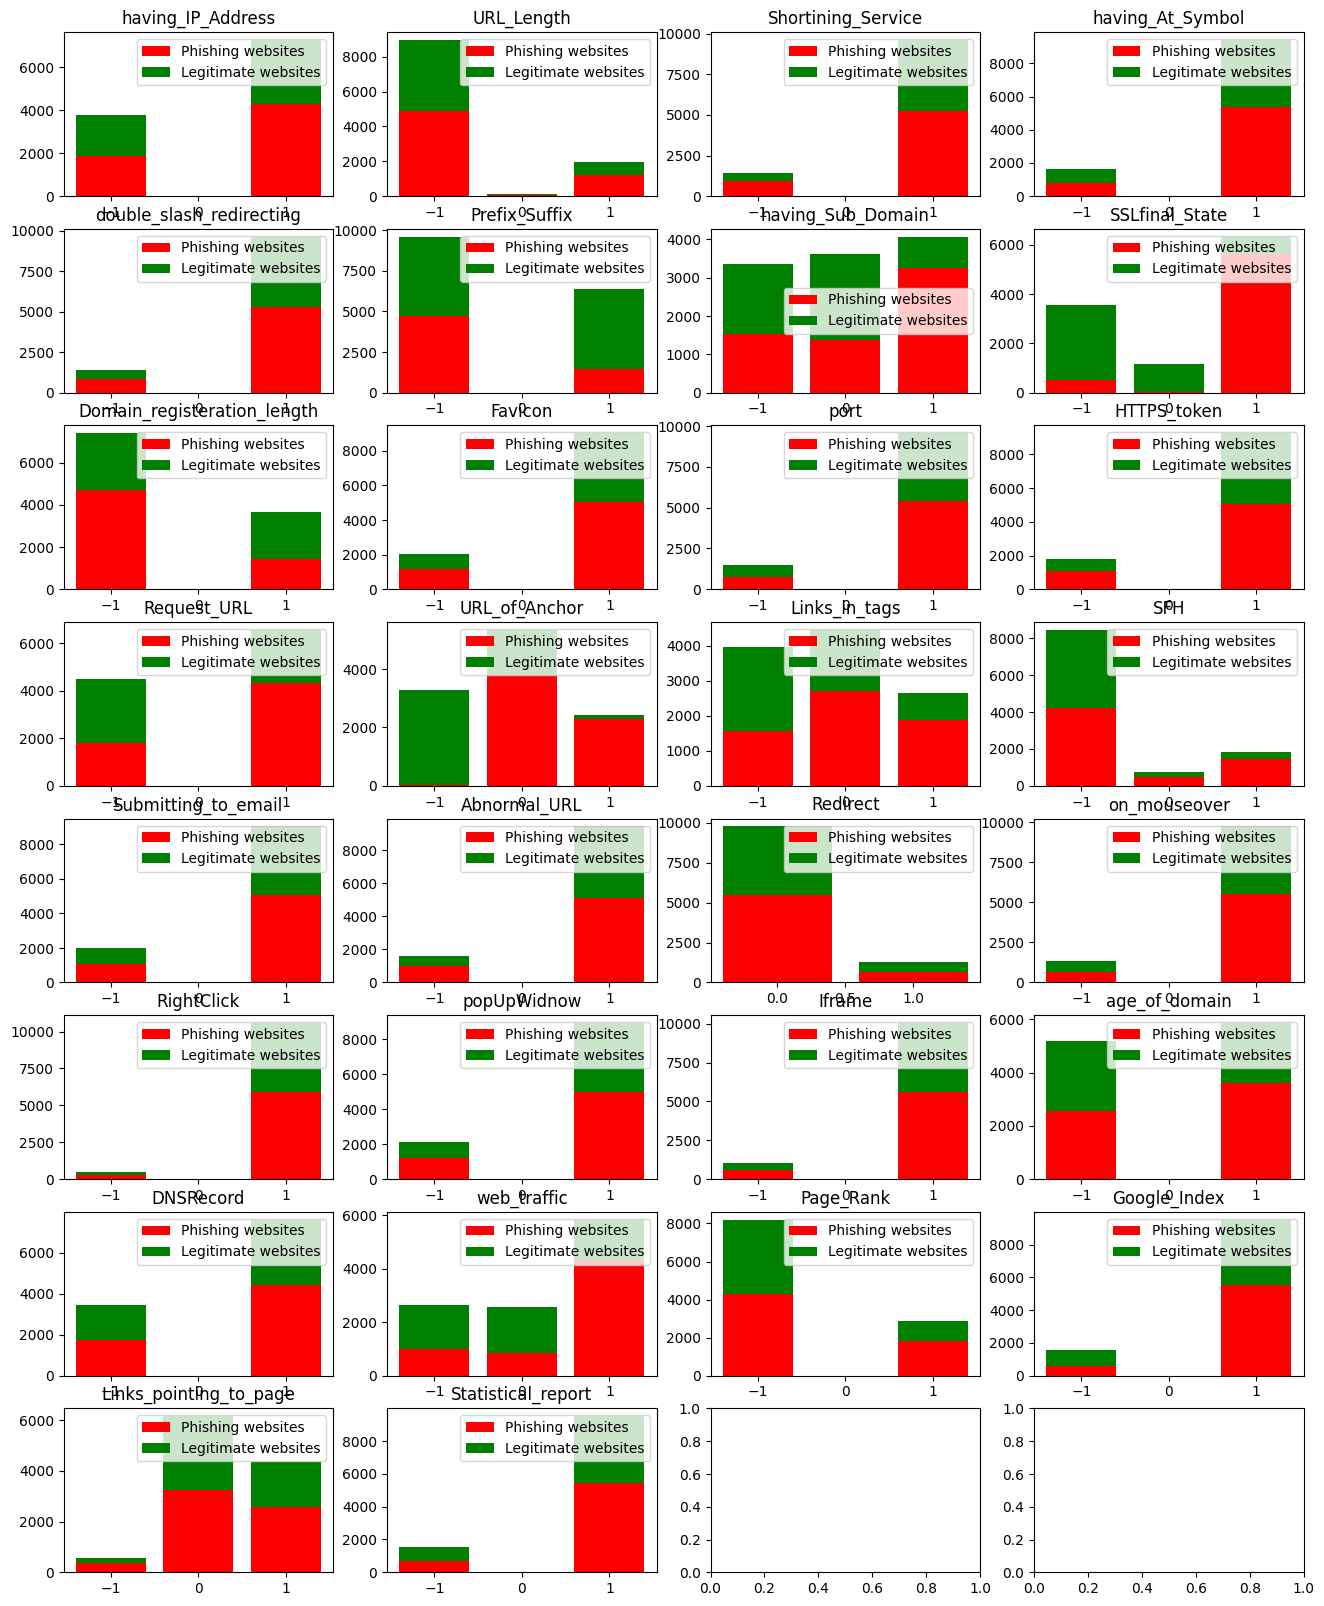

In [142]:
figure, axis = plt.subplots(8, 4)

row = 0
col = 0
ctr = 0
for data_col in X.columns:
    count_phishing_websites = data.loc[data["Result"] == 1,:].groupby(data_col).count().loc[:, "Result"].values
    count_legitimate_websites = data.loc[data["Result"] == -1,:].groupby(data_col).count().loc[:,"Result"].values
    title_name = data.groupby(data_col).count().index.values
    
    axis[row,col].set_title(data_col)
    axis[row,col].bar(title_name, count_phishing_websites, color='red', label='Phishing websites')
    axis[row,col].bar(title_name, count_legitimate_websites, color='green', label='Legitimate websites', bottom=count_phishing_websites)
    axis[row,col].legend(loc='best')    
    
    ctr += 1
    row = ctr // 4
    col = ctr % 4

plt.show()